# TensorFlow Checkpoint (Paired Programming)

This assessment covers building and training a `tf.keras` `Sequential` model, then applying regularization.  The dataset comes from a ["don't overfit" Kaggle competition](https://www.kaggle.com/c/dont-overfit-ii).  There are 300 features labeled 0-299, and a binary target called "target".  There are only 250 records total, meaning this is a very small dataset to be used with a neural network. 

_You can assume that the dataset has already been scaled._

In [1]:
# Run this cell without changes

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## 1) Prepare Data for Modeling

* Using `pandas`, open the file `data.csv` as a DataFrame
* Drop the `"id"` column, since this is a unique identifier and not a feature
* Separate the data into `X` (a DataFrame with all columns except `"target"`) and `y` (a Series with just the `"target"` column)
* The train-test split should work as-is once you create these variables

In [2]:
# Replace None with appropriate code

# Read in the data
df = pd.read_csv('data.csv')

# Drop the "id" column
df.drop('id', axis=1, inplace=True)

# Separate into X and y
X = df.drop('target', axis=1)
y = df.target

### BEGIN SOLUTION
# df = pd.read_csv("data.csv")
# df.drop("id", axis=1, inplace=True)

# X = df.drop("target", axis=1)
# y = df["target"]
### END SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)
X_train.shape

(187, 300)

In [3]:
assert type(df) == pd.DataFrame
assert type(X) == pd.DataFrame
assert type(y) == pd.Series

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS
### BEGIN HIDDEN TESTS
assert X_train.shape == (187, 300)
assert y_train.shape == (187,)
### END HIDDEN TESTS

## 2) Instantiate a `Sequential` Model

In the cell below, create an instance of a `Sequential` model ([documentation here](https://keras.io/guides/sequential_model/)) called `dense_model` with a `name` of `"dense"` and otherwise default arguments.

*In other words, create a model without any layers. We will add layers in a future step.*

In [4]:
# Replace None with appropriate code
dense_model = Sequential(name='dense')
### BEGIN SOLUTION
# dense_model = Sequential(name="dense")
### END SOLUTION

dense_model.name

'dense'

In [5]:
# Model should not have any layers yet
assert len(dense_model.layers) == 0
# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS
### BEGIN HIDDEN TESTS
assert type(dense_model) == Sequential
assert dense_model.name == "dense"
### END HIDDEN TESTS

## 3) Determine Input and Output Shapes

How many input and output nodes should this model have?

Feel free to explore the attributes of `X` and `y` to determine this answer, or just to enter numbers based on the problem description above.

In [7]:
# Replace None with appropriate code
num_input_nodes = X.shape[1]
num_output_nodes = 1
### BEGIN SOLUTION
# The number of input nodes is the number of features
# num_input_nodes = X.shape[1]
# For a binary classification task, we only need 1 output node
# num_output_nodes = 1
### END SOLUTION

In [8]:
# Both values should be integers
assert type(num_input_nodes) == int
assert type(num_output_nodes) == int
# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS
### BEGIN HIDDEN TESTS
score = 0

# 300 features, so 300 input nodes
if num_input_nodes == 300:
    score += 0.5
    
# binary output, so 1 output node
if num_output_nodes == 1:
    score += 0.5
elif num_output_nodes == 2:
    # Partial credit for this answer, since it's technically
    # possible to use 2 output nodes for this, although it's
    # confusingly redundant
    score += 0.25

score
### END HIDDEN TESTS

1.0

The code below will use the input and output shapes you specified to add `Dense` layers to the model:

In [9]:
# Run this cell without changes

# Add input layer
dense_model.add(Dense(units=64, input_shape=(num_input_nodes,)))

# Add hidden layers
dense_model.add(Dense(units=64))
dense_model.add(Dense(units=64))

dense_model.layers

## 4) Add an Output Layer

Specify an appropriate activation function ([documentation here](https://keras.io/api/layers/activations/)).

We'll simplify the problem by specifying that you should use the string identifier for the function, and it should be one of these options:

* `sigmoid`
* `softmax`

***Hint:*** is this a binary or a multi-class problem? This should guide your choice of activation function.

In [10]:
# Replace None with appropriate code
activation_function = 'sigmoid'
### BEGIN SOLUTION
# activation_function = "sigmoid"
### END SOLUTION

In [11]:
# activation_function should be a string
assert type(activation_function) == str
# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS
### BEGIN HIDDEN TESTS
if num_output_nodes == 1:
    assert activation_function == "sigmoid"
else:
    # The number of output nodes _should_ be 1, but we'll
    # give credit for a matching function even if the
    # previous answer was incorrect
    assert activation_function == "softmax"
### END HIDDEN TESTS

Now we'll use that information to finalize the model.

If this code produces an error, consider restarting the kernel and re-running the code above. If it still produces an error, that is an indication that one or more of your answers above is incorrect.

In [12]:
# Run this cell without changes

# Add output layer
dense_model.add(Dense(units=num_output_nodes, activation=activation_function))

# Determine appropriate loss function
if num_output_nodes == 1:
    loss = "binary_crossentropy"
else:
    loss = "categorical_crossentropy"

# Compile model
dense_model.compile(
    optimizer="adam",
    loss=loss,
    metrics=["accuracy"]
)

dense_model.summary()

Model: "dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                19264     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 27,649
Trainable params: 27,649
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Run this cell without changes

# Fit the model to the training data, using a subset of the
# training data as validation data
dense_model_results = dense_model.fit(
    x=X_train,
    y=y_train,
    batch_size=None,
    epochs=20,
    verbose=1,
    validation_split=0.4,
    shuffle=False
)

Epoch 1/20
4/4 [==============================] - 1s 179ms/step - loss: 0.8796 - accuracy: 0.5268 - val_loss: 0.8899 - val_accuracy: 0.5467
Epoch 2/20
4/4 [==============================] - 0s 32ms/step - loss: 0.4790 - accuracy: 0.7857 - val_loss: 0.8516 - val_accuracy: 0.5333
Epoch 3/20
4/4 [==============================] - 0s 25ms/step - loss: 0.3232 - accuracy: 0.8661 - val_loss: 0.8619 - val_accuracy: 0.5867
Epoch 4/20
4/4 [==============================] - 0s 24ms/step - loss: 0.2279 - accuracy: 0.9286 - val_loss: 0.9032 - val_accuracy: 0.6133
Epoch 5/20
4/4 [==============================] - 0s 16ms/step - loss: 0.1553 - accuracy: 0.9643 - val_loss: 0.9667 - val_accuracy: 0.6267
Epoch 6/20
4/4 [==============================] - 0s 23ms/step - loss: 0.0984 - accuracy: 0.9821 - val_loss: 1.0486 - val_accuracy: 0.6267
Epoch 7/20
4/4 [==============================] - 0s 16ms/step - loss: 0.0573 - accuracy: 0.9911 - val_loss: 1.1447 - val_accuracy: 0.6400
Epoch 8/20
4/4 [==========

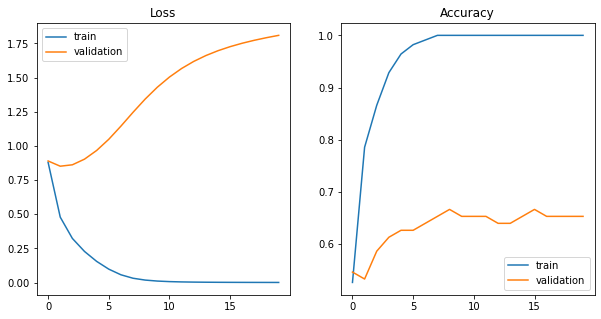

In [14]:
# Run this cell without changes

def plot_loss_and_accuracy(results, final=False):
    
    if final:
        val_label="test"
    else:
        val_label="validation"

    # Extracting metrics from model fitting
    train_loss = results.history['loss']
    val_loss = results.history['val_loss']
    train_accuracy = results.history['accuracy']
    val_accuracy = results.history['val_accuracy']

    # Setting up plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plotting loss info
    ax1.set_title("Loss")
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label="train")
    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label=val_label)
    ax1.legend()

    # Plotting accuracy info
    ax2.set_title("Accuracy")
    sns.lineplot(x=results.epoch, y=train_accuracy, ax=ax2, label="train")
    sns.lineplot(x=results.epoch, y=val_accuracy, ax=ax2, label=val_label)
    ax2.legend()
    
plot_loss_and_accuracy(dense_model_results)

## 5) LEVEL UP Modify the Code Below to Use Regularization (Optional)


The model appears to be overfitting. To deal with this overfitting, modify the code below to include regularization in the model. You can add L1, L2, both L1 and L2, or dropout regularization.

Hint: these might be helpful

 - [`Dense` layer documentation](https://keras.io/api/layers/core_layers/dense/)
 - [`regularizers` documentation](https://keras.io/regularizers/)
 
(`EarlyStopping` is a type of regularization that is not applicable to this problem framing, since it's a callback and not a layer.)

Evaluation and Regularization of neural networks will be discussed in the future.

In [21]:
def build_model_with_regularization(n_input, n_output, activation, loss):
    """
    Creates and compiles a tf.keras Sequential model with two hidden layers
    This time regularization has been added
    """
    # create classifier
    classifier = Sequential(name="regularized")

    # add input layer
    classifier.add(Dense(units=64, input_shape=(n_input,)))

    # add hidden layers
    classifier.add(Dense(units=64, kernel_regularizer=regularizers.l2(0.0000000000000001)))
    classifier.add(Dropout(0.8))
    classifier.add(Dense(units=64, kernel_regularizer=regularizers.l2(0.0000000000000001)))
    ### BEGIN SOLUTION
    
    # they might add a kernel regularizer
    # classifier.add(Dense(units=64, kernel_regularizer=regularizers.l2(0.0000000000000001)))
    # they might add a dropout layer
    # classifier.add(Dropout(0.8))
    # classifier.add(Dense(units=64, kernel_regularizer=regularizers.l2(0.0000000000000001)))
    
    ### END SOLUTION

    # add output layer
    classifier.add(Dense(units=n_output, activation=activation))

    classifier.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    return classifier

model_with_regularization = build_model_with_regularization(
    num_input_nodes, num_output_nodes, activation_function, loss
)
model_with_regularization.summary()

Model: "regularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                19264     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 27,649
Trainable params: 27,649
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Testing function to build model
assert type(model_with_regularization) == Sequential

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS
### BEGIN HIDDEN TESTS
def check_regularization(model):
    regularization_count = 0
    for layer in model.get_config()['layers']:
        
        # Checking if kernel regularizer was specified
        if 'kernel_regularizer' in layer['config']:
            if layer['config'].get('kernel_regularizer'):
                regularization_count += 1
                
        # Checking if layer is dropout layer
        if layer["class_name"] == "Dropout":
            regularization_count += 1
            
    return regularization_count > 0
    
score = .3

if check_regularization(model_with_regularization):
    score += .7
    
score
### END HIDDEN TESTS

1.0

Now we'll evaluate the new model on the training set as well:

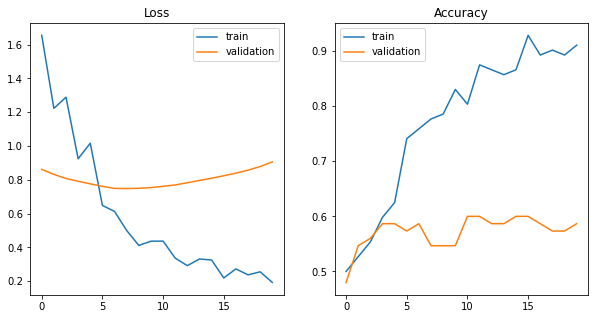

In [23]:
# Run this cell without changes

# Fit the model to the training data, using a subset of the
# training data as validation data
reg_model_results = model_with_regularization.fit(
    x=X_train,
    y=y_train,
    batch_size=None,
    epochs=20,
    verbose=0,
    validation_split=0.4,
    shuffle=False
)

plot_loss_and_accuracy(reg_model_results)

(Whether or not your regularization made a difference will partially depend on how strong of regularization you applied, as well as some random elements of your current TensorFlow configuration.)

Now we evaluate both models on the holdout set:

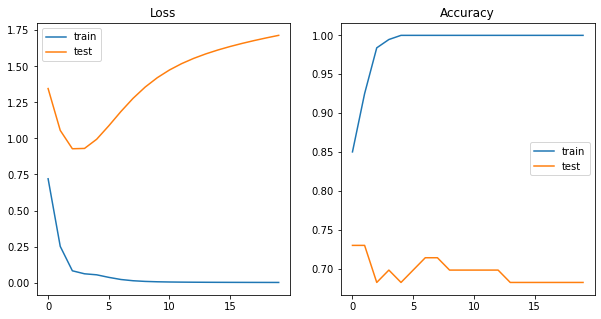

In [24]:
# Run this cell without changes

final_dense_model_results = dense_model.fit(
    x=X_train,
    y=y_train,
    batch_size=None,
    epochs=20,
    verbose=0,
    validation_data=(X_test, y_test),
    shuffle=False
)

plot_loss_and_accuracy(final_dense_model_results, final=True)

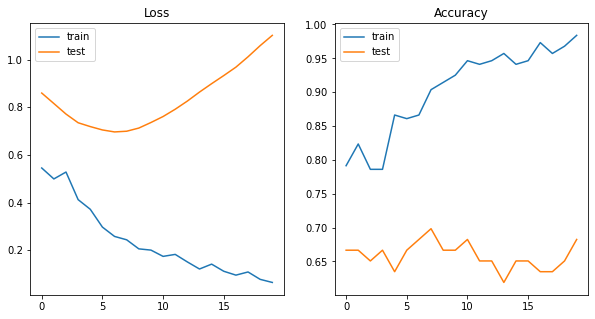

In [25]:
final_reg_model_results = model_with_regularization.fit(
    x=X_train,
    y=y_train,
    batch_size=None,
    epochs=20,
    verbose=0,
    validation_data=(X_test, y_test),
    shuffle=False
)

plot_loss_and_accuracy(final_reg_model_results, final=True)